In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
import nltk

In [17]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
df.shape

(50000, 2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Distribution of Postive / Negative Emotions')

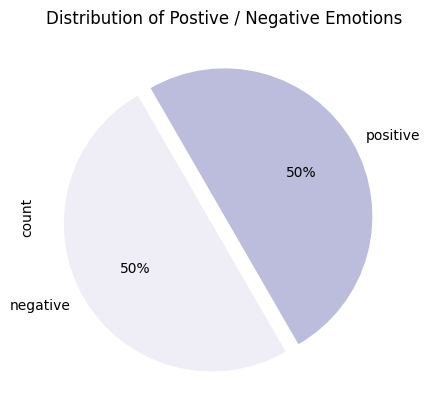

In [22]:
df['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct="%2.0f%%", startangle=300,colors= ["#BCBDDC","#EFEDF5"])
plt.title("Distribution of Postive / Negative Emotions")

In [23]:
for i in range(3):
    print("Review: ",[i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment: ",df['sentiment'].iloc[i],"\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [32]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count


In [33]:
df["word_count"] = df['review'].apply(no_of_words)

In [34]:
df.head(10)

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
5,"Probably my all-time favorite movie, a story o...",positive,119
6,I sure would like to see a resurrection of a u...,positive,150
7,"This show was an amazing, fresh & innovative i...",negative,174
8,Encouraged by the positive comments about this...,negative,130
9,If you like original gut wrenching laughter yo...,positive,33


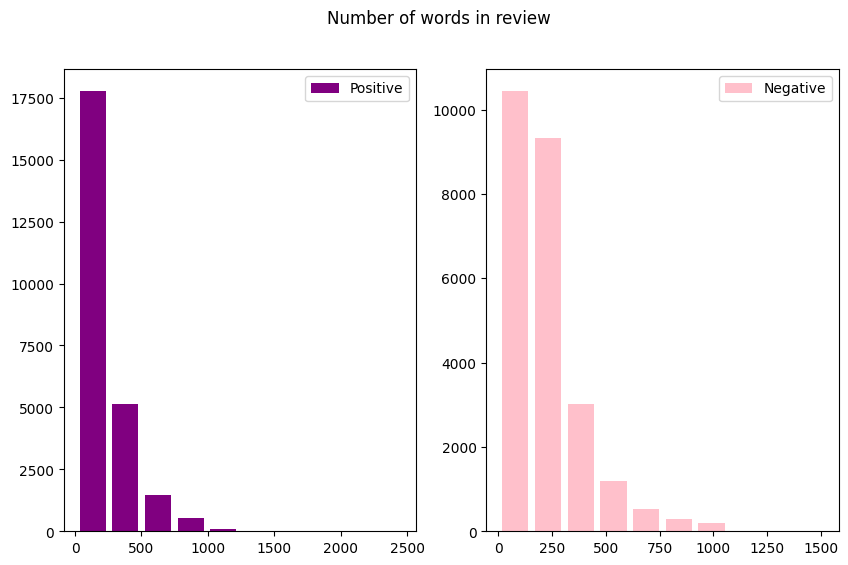

In [39]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word_count'], label= 'Positive', color='purple', rwidth = 0.8);
ax[1].hist(df[df['sentiment'] == 'negative']['word_count'], label= 'Negative', color='pink', rwidth = 0.8);

ax[0].legend(loc = 'upper right');
ax[1].legend(loc = 'upper right');

fig.suptitle("Number of words in review")
plt.show()

In [45]:
df.replace({"positive":1},inplace=True)
df.replace({"negative":0},inplace=True)

C:\Users\hdewa\AppData\Local\Temp\ipykernel_7776\3262510158.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"positive":1},inplace=True)


In [46]:
df

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


In [52]:

# Initialize stopwords set
stop_words = set(stopwords.words('english'))

def process(review):
    # Remove HTML tags
    review = BeautifulSoup(review, "html.parser").get_text()
    
    # Convert to lowercase
    review = review.lower()
    
    # Remove URLs
    review = re.sub(r'https?://\S+|www\.\S+', '', review)
    
    # Remove mentions and hashtags
    review = re.sub(r'@\w+|#\w+', '', review)
    
    # Remove non-alphabetic characters
    review = re.sub(r'[^a-z\s]', '', review)
    
    # Tokenize
    tokens = word_tokenize(review)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    return ' '.join(filtered_tokens)



In [57]:
df.review = df['review'].apply(process)

In [58]:
duplicated_count = df.duplicated().sum()

In [59]:
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [60]:
df = df.drop_duplicates("review")

In [61]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return "".join(text)


In [62]:
df.review = df["review"].apply(lambda x: stemming(x))

C:\Users\hdewa\AppData\Local\Temp\ipykernel_7776\324349768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review = df["review"].apply(lambda x: stemming(x))


In [63]:
print(df.review)

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49578, dtype: object


In [64]:
df["new_word_count"] = df["review"].apply(no_of_words)
df.head()

C:\Users\hdewa\AppData\Local\Temp\ipykernel_7776\1880828568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["new_word_count"] = df["review"].apply(no_of_words)


,review,sentiment,word_count,new_word_count
0,one reviewers mentioned watching oz episode yo...,1,307,167
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,85
3,basically theres family little boy jake thinks...,0,138,66
4,petter matteis love time money visually stunni...,1,230,125


In [65]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word_count,new_word_count
0,one reviewers mentioned watching oz episode yo...,1,307,167
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,85
4,petter matteis love time money visually stunni...,1,230,125
5,probably alltime favorite movie story selfless...,1,119,56


In [66]:
from collections import Counter
count  = Counter()
for text in pos_reviews["review"].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('film', 39303),
 ('movie', 35854),
 ('one', 25630),
 ('like', 17000),
 ('good', 14291),
 ('great', 12572),
 ('story', 12347),
 ('see', 11818),
 ('time', 11739),
 ('well', 10937),
 ('really', 10640),
 ('also', 10520),
 ('would', 10320),
 ('even', 9320),
 ('much', 8974)]

In [67]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ["word",'count']
pos_words.head()

,word,count
0,film,39303
1,movie,35854
2,one,25630
3,like,17000
4,good,14291


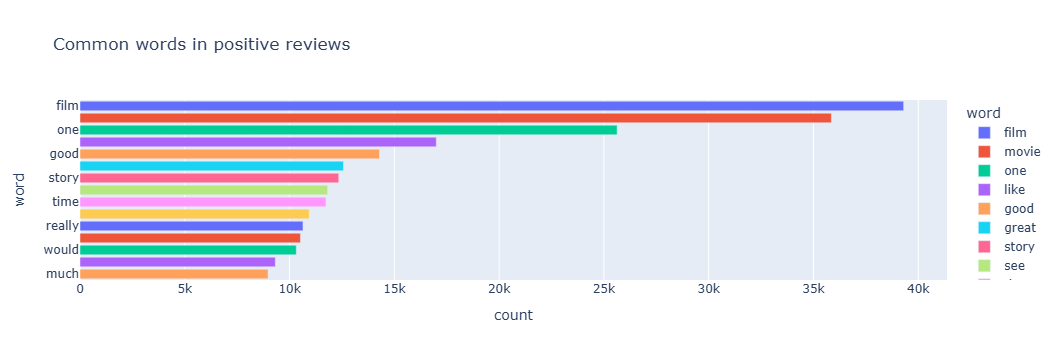

In [68]:
px.bar(pos_words, x = 'count', y= 'word', title= 'Common words in positive reviews', color= 'word')

In [71]:
neg_reviews = df[df.sentiment == 0]

count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)


[('movie', 47046),
 ('film', 34686),
 ('one', 24376),
 ('like', 21514),
 ('even', 14761),
 ('good', 14002),
 ('bad', 13930),
 ('would', 13482),
 ('really', 12087),
 ('time', 11368),
 ('see', 10413),
 ('dont', 9920),
 ('get', 9886),
 ('much', 9758),
 ('story', 9572)]

In [72]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

,word,count
0,movie,47046
1,film,34686
2,one,24376
3,like,21514
4,even,14761


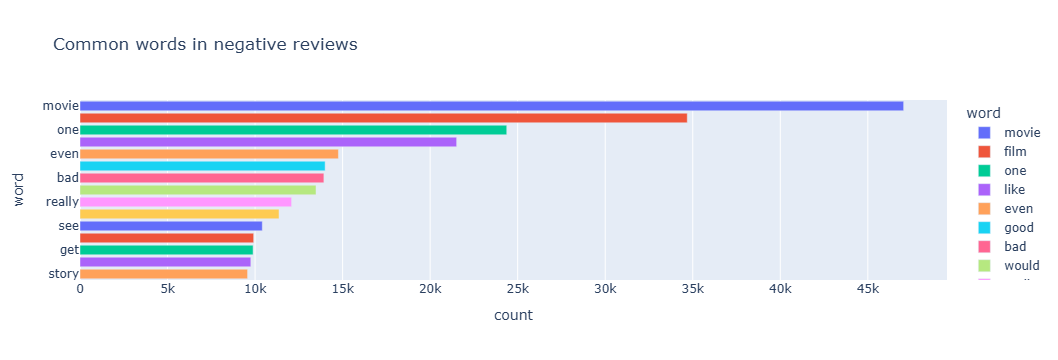

In [73]:
px.bar(neg_words, x = 'count', y= 'word', title= 'Common words in negative reviews', color= 'word')

In [74]:
X = df['review']
Y = df['sentiment']

In [75]:
X

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49578, dtype: object

In [76]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49578, dtype: int64

In [77]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [81]:
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (34704, 214278)
Size of y_train:  (34704,)
Size of x_test:  (14874, 214278)
Size of y_test:  (14874,)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test accuracy : {:.2f}%".format(logreg_acc*100))


Test accuracy : 88.88%


In [87]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[6449  912]
 [ 742 6771]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [90]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.22%


In [91]:
print(confusion_matrix(y_test,mnb_pred))
print("\n")
print(classification_report(y_test,mnb_pred))

[[6411  950]
 [1100 6413]]


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7361
           1       0.87      0.85      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [92]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.02%


In [93]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[6491  870]
 [ 763 6750]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"solver": ['newton-cg','lbfgs','liblinear','sag','saga']},
             {'penalty': ['none','elasticnet','l1','l2']},
             {'C': [0.001,0.01,0.1,1,10,100]}]
grid = GridSearchCV(logreg, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..................solver=newton-cg;, score=0.888 total time=   1.1s
[CV 2/5] END ..................solver=newton-cg;, score=0.891 total time=   1.1s
[CV 3/5] END ..................solver=newton-cg;, score=0.886 total time=   1.1s
[CV 4/5] END ..................solver=newton-cg;, score=0.893 total time=   1.1s
[CV 5/5] END ..................solver=newton-cg;, score=0.888 total time=   1.1s
[CV 1/5] END ......................solver=lbfgs;, score=0.889 total time=  48.1s
[CV 2/5] END ......................solver=lbfgs;, score=0.893 total time=  34.9s
[CV 3/5] END ......................solver=lbfgs;, score=0.887 total time=  25.9s
[CV 4/5] END ......................solver=lbfgs;, score=0.893 total time=  29.9s
[CV 5/5] END ......................solver=lbfgs;, score=0.889 total time=  19.4s
[CV 1/5] END ..................solver=liblinear;, score=0.888 total time=  11.9s
[CV 2/5] END ..................solver=liblinear;

C:\Users\hdewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hdewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hdewa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Us

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             verbose=3)

In [100]:
print("Best cross validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross validation score: 0.8924
Best parameters:  {'C': 10}


In [101]:
logreg = LogisticRegression(C= 10)
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test accuracy : {:.2f}%".format(logreg_acc*100))

Test accuracy : 89.09%


In [102]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[6501  860]
 [ 763 6750]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

